# Gravity signals from GRACE for measuring ice mass loss
In this lab we are going to analyze some data from the GRACE (Gravity Recovery and Climate Experiment) satellite mission and use it to estimate (1) ice mass loss from Greenland, (2) ice mass loss from Antarctica, and (3) the change in global sea level that could arise if all of the ice mass loss is due to ice melting into liquid water. You will access data from the Grace mission, import it into your Jupyter notebook on Google Colab, and plot and analyze the results. 

## A couple important points to make: 
- When you make changes this notebook, those changes are not saved in Github or anywhere else, so you need to download the notebook to save your changes. 
- You can re-upload this notebook instead of the original notebook from Github if you want to stop working and come back at another time. Just "Download .ipynb" and save to your desired location on your computer. Alternatively, you can save the notebook to your Google Drive and load it directly from there using Google Colab's interface with Google Drive (File - Open Notebook - select "Google Drive" and give Colab access to your Google Drive). You can also click on the "Copy to Drive" button at the top of the notebook.
- You will need to put the GRACE data you obtain into a place that Google Colab can find it. You can do this by either directly uploading from your computer or adding your Google drive to your Colab session. Examples of how to do both are provided below.
- **When you are finished with the notebook, make sure all the cells have run (so that all the plots show up, etc.) and then download your notebook and upload it to Canvas under the File Upload option for Homework 2.**

In [10]:
import time

import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Get the data
We will obtain the mass anomaly data from the __["Mascon Visualization Tool"](https://ccar.colorado.edu/grace/index.html)__ available from the __[Colorado Center for Astrodynamics Research](https://www.colorado.edu/ccar/)__. Navigate to the webpage and spend a few minutes looking at the __[FAQ](https://ccar.colorado.edu/grace/faq.html)__ and __[About](https://ccar.colorado.edu/grace/about.html)__ pages. Then navigate to the main page. For this excercise, you will need to download data for both Greenland and Antarctica using both the JPL and GSFZ solutions. Navigate to each type of solution (JPL/GSFZ), then click on the region of interest (Greenland/Antarctica). Select "Gt" (gigatons) under "Units" and make sure "Deseason" is "off". Download the data (you will need to do this for each dataset, a total of four times) and save to a location where you can upload it to this notebook on Google Colab (see below).

**Note:** Remember that GRACE is only sensitive to wavelengths greater than around 300 km. 

**Note:** A Glacial Isostatic Adjustment (GIA) estimate has already been removed from the data (see __[this website](https://ccar.colorado.edu/grace/about.html)__)

### Another option for data access
__[The Grace Plotter](http://thegraceplotter.com/)__ is another website where you can access GRACE data. You can explore using this website on your own if you want. The data is only available as water equivalent, but you can still look at overall trends and compare regions. Pick a point and plot the data.

## Look at individual mascons
Pick one of the solutions and navigate to Greenland again. This time instead of selecting a region, select "trend" in the selection box (if you click a region first, click the minimize button in the corner to get back to the selection box). You can select individual mascons in Greenland. Note that some mascons have positive trends and some are negative. Double-click the cell below and write your observations. What patterns are visible (if any)? What do you think they mean? Do some searching on the website as well as the broader web to see if you can find out the meaning of this interesting pattern. 

### ***Write your response here***

## Uploading data files
Depending on whether you are uploading directly or usingi Google Drive, uncomment and run the code below to access your data files downloaded in the previous step. 
1. If you are doing a direct upload, uncommenting the first option and running the cell will raise a prompt that you can use to select and upload the files.
2. If using Google Drive, uncomment the second option and run. 

In [1]:
### Upload your data files ###
# from google.colab import files
# uploaded = files.upload()


### Use Google Drive ###
# from google.colab import drive
# drive.mount('/gdrive')

In [12]:
# With either option, you can then import the data using pandas, for example: 
#import pandas as pd
Nskip = 9 # change to number of rows to skip
filename = "../data/GSFC_region0100_GreenlandIceSheet.csv" # need to include /gdrive/ in the filename if importing from google drive
df = pd.read_csv(filename, skiprows=Nskip) # you will need to skip the header rows. Look at the file on your computer to see how many rows you need to skip
df.head()

,year,Gt
0,2002.295,1138.134
1,2002.358,1178.438
2,2002.626,864.479
3,2002.709,790.367
4,2002.793,837.638


## Plotting the data
Create plots showing the data from Greenland and Antarctica. Plot the mass (Gt/yr) versus time, and include both data sources (i.e., JPL and GSFZ) on the same plot. Make two different plots for Greenland and Antarctica, but plot them using the same y-axis to facilitate direct comparison. 

**Note:** The dates given in each dataset are reported differently; some are "days since ..." and some are absolute dates. You will need to convert all dates to absolute dates. To do this, use the "datetime" module in Python and the function defined in the cell below. For the dates given as "days since ...", first convert them to Python datetimes (look at the documentation for __[strftime](https://docs.python.org/3/library/datetime.html#datetime.datetime.strptime)__ and __[timedelta](https://docs.python.org/3/library/datetime.html#timedelta-objects)__). Once you have datetimes you can create a new column in the dataframe with the decimal years.

<div class="alert alert-block alert-info">
<b>Tip:</b> Make sure to import the libraries you need. For example, "import matplotlib.pyplot as plt" for plots, and "import numpy as np" for math operations using numpy.
</div>

In [7]:
# You don't need to change this cell, but make sure to run it so you have the functions defined!
# Functions needed
def dt2fracYear(date):
    '''
    Convert Python datetimes to fractional (decimel) years
    
    Parameters
    ----------
    date - Python datetime (e.g. datetime.datetime(2018,1,1))
    
    Returns
    -------
    Fractional datetime, i.e.: 2018.08
    
    Example:
    >>> d = datetime.datetime(2018,2,1)
    >>> d_frac = dt2fracYear(d)
    >>> print(d_frac) # prints 2018.0849315068492
    '''
    
    def sinceEpoch(date): # returns seconds since epoch
        return time.mktime(date.timetuple())
    s = sinceEpoch

    # check that the object is a datetime
    try:
        year = date.year
    except AttributeError:
        date = numpyDT64ToDatetime(date)
        year = date.year

    startOfThisYear = dt.datetime(year=year, month=1, day=1)
    startOfNextYear = dt.datetime(year=year+1, month=1, day=1)

    yearElapsed = s(date) - s(startOfThisYear)
    yearDuration = s(startOfNextYear) - s(startOfThisYear)
    fraction = yearElapsed/yearDuration
    date_frac = date.year + fraction

    return date_frac

def numpyDT64ToDatetime(dt64):
    '''
    Convert a numpy datetime64 object to a python datetime object
    (Only gets called inside dt2fracYear, you do not need to call this separately)
    '''
    unix_epoch = np.datetime64(0, 's')
    one_second = np.timedelta64(1, 's')
    seconds_since_epoch = (dt64 - unix_epoch) / one_second
    return dt.datetime.utcfromtimestamp(seconds_since_epoch)

In [31]:
# Some examples of how to convert to Python datetimes assuming that "df" is the name of your dataframe containing date information
# fmt = '%Y-%m-%d' for 2019-01-01
# fmt = '%j' for day of year
# df['Datetime'] = df['Date'].apply(lambda x: dt.datetime.strftime(x, fmt)) #<-- Use this if "Date" is a string 
# You can also add dates: df['Datetime'] = df['Days since 1900'].apply(lambda x: dt.datetime(1900,1,1) + dt.timedelta(days=x)) # <-- Use this if "Days since 1900" is an integer number of days
# Etc.

Once you've created columns or variables containing fractional dates, you can use those to create a time-series plot of mass versus time. This should in general look like 
```
plt.plot(time, mass, label='JPL')
```
You will want to include both data sources on each plot with a legend, title showing which area is being plotted, etc. 

<div class="alert alert-block alert-info">
<b>Tip:</b> Make sure to include axis labels, legends, plot titles, etc. as needed for someone else to understand your plot!
</div>

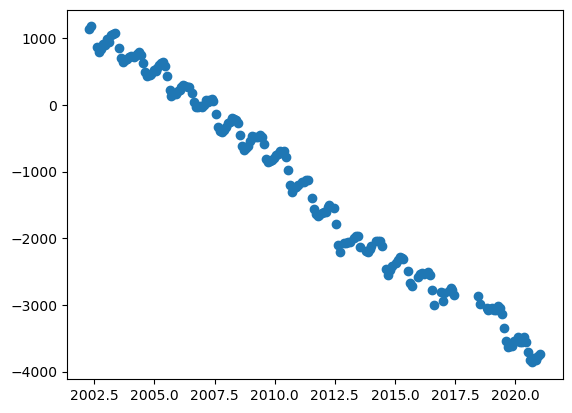

In [14]:
# Your code for the Greenland plot here
plt.scatter(df['year'], df['Gt'], marker='o')

In [ ]:
# Your code for the Antartica plot here

## Questions
Write Python code in the following cells to answer the following questions:
1. Based on the data plotted above:
    a. what is the total ice mass change for each region (Greenland/Antartica)?
    b. which ice sheet has lost the greater mass? 
2. Based on the data plotted above:
    a. what is the mass loss rate for each region in Gt/yr?
    b. which ice sheet has a greater mass loss rate?
3. What is the total mass loss for Greenland over the time period 2003-01-01 to 2016-01-01 in Gt? 
4. What is the total mass loss for Antarctica over the time period 2003-01-01 to 2016-01-01 in Gt? 

In [8]:
# code for question 1a

In [9]:
# code for question 1b

In [10]:
# code for question 2a

In [11]:
# code for question 2b

In [12]:
# code for question 3

In [13]:
# code for question 4

# Impact of melting ice on sea level
The ice sheet mass loss trends recorded by GRACE for Antarctica and Greenland indicate that land-based ice has melted, and this mass is being added to the oceans. To convert a mass of ice into the global sea-level equivalent (SLE) rise requires knowing the following: 
1. The area covered by oceans on Earth= 3.618 x 10^8 km^2
2. The volume of water equivalent to ice mass lost to volume of liquid water: V = mass/density (density of water is 1000 kg/m^3)
3. The total change in global ocean levels is obtained by dividing the total volume gained by the total area of the oceans. 

Work out the total sea level change equivalent separately for Greenland, Antarctica, and the two combined. Do this for each of the solutions (JPL/GSFZ). 

Print the results of each question to the screen output

In [15]:
# Your code here
densityWater = 1000 # kg/m^3
oceansAreaKM2 = 3.618e8 # km^2

# convert oceansAreaKM2 to area in meters squared
ocenasAreaM2 = 0 # replace "0" with your code

# Your results for total mass change from questions 1-4 above
# Make sure to convert Gigatons to kg! 

# Total liquid water volume change

# Total height change of the global oceans if all water goes into the ocean

Now create new time-series plots showing the sea-level change through time. Do this for the Greenland and Antarctica datasets and for each solution (JPL/GSFZ). You should have two plots, with the two solutions posted on each plot. 

To solve this problem, you can add new columns to each dataframe you generated when you imported the data. For example: 

In [ ]:
# Add a 
df['MassLoss_kg'] = df['Gt']*1e12
df['VolumeLiquidWater'] = df['MassLoss_kg']/densityWater
df['SeaLevelChange_m'] = df['VolumeLiquidWater']/oceansAreaM2 # Watch your units!!
df['SeaLevelChange_mm'] = df['SeaLevelChange_m']*1000

You will need to do this for each dataset, then plot the results. Show your plots below!

In [16]:
# your code here for the Greenland plot

In [17]:
# your code here for the Antarctica plot

## Wrapping up
In this homework we looked at sea level change that is possible given ice mass loss through melting in Greenland and Antarctica. Real sea level change is much more complicated and is affected by land water mass change and thermal expansion and contraction of the oceans due to temperature changes, among other sources. While we were not able to explore these in this lab, in your final project you could choose to look at the impact of all these sources of sea level change. 